In [73]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

In [74]:
import geopandas as gd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Merge Data
df : data of divar, mahalat : data of district number , features : data of mazrkaz_amar_iran

In [75]:
df = pd.read_csv("dataset_divar_cleaned_V2.csv")
mahalat = pd.read_csv("Mahalat.csv")
features = pd.read_csv("Untitled spreadsheet - Sheet1.csv")

In [76]:
df.district = df.district.str.strip()
df.district=df.district.apply(lambda x:x.replace('\u200c',' '))

In [77]:
df.district=df.district.astype('string')

df=df.drop(df.loc[(df['year']==1401)& (df['district']==' دریاچه شهدای خلیج فارس') |(df['district']==' دهکده المپیک' )| 
(df['district']==' سرو آزاد')| (df['district']==' چیتگر')].index)
df=df.drop(df.loc[(df['year']==1401)& (df['district']==' چیتگر ')].index)
df.drop(df.loc[df.area<=30].index,inplace=True)
df.drop(df.loc[df.area>=300].index,inplace=True)
df.drop(df.loc[df.floor>=7].index,inplace=True)
df.drop(df.loc[df.value<=1000000000].index,inplace=True)
# df.drop(df.loc[df.value==50000000].index,inplace=True)

df.sort_values('value',ascending=True)

df.reset_index(drop=True)

,district,area,year,rooms,value,floor,elevator,parking,warehouse
0,نیاوران,257,1390,3,25000000000,3,True,True,True
1,دریاچه شهدای خلیج فارس,132,1390,3,6000000000,4,True,True,True
2,طرشت,85,1392,2,4200000000,4,True,True,True
3,دارآباد,145,1401,3,13000000000,5,True,True,True
4,سعادت آباد,110,1399,2,13750000000,1,True,True,True
...,...,...,...,...,...,...,...,...,...
44108,مسعودیه,68,1400,2,2350000000,4,True,True,True
44109,نارمک,135,1382,2,5390000000,1,False,True,True
44110,تهرانپارس شرقی,54,1398,1,3200000000,2,True,True,True
44111,قیطریه,105,1401,2,12600000000,3,True,True,True


In [78]:
data = pd.merge(df,mahalat )
data = pd.merge(data,features )

In [79]:
data.to_csv('data.csv')

# Clean Data

In [292]:
data = pd.read_csv("data.csv")

In [293]:
data['value_metr'] = ((data['value'] / data['area'])/ 1000000).round(0)

In [294]:
data['value'] = (data['value']/1000000000).round(0)

In [295]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [296]:
data['elevator'] = data['elevator'].astype('int64')
data['parking'] = data['parking'].astype('int64')
data['warehouse'] = data['warehouse'].astype('int64')

In [297]:
data

,district,area,year,rooms,value,floor,elevator,parking,warehouse,District_number,...,population95,population_man95,population_woman95,kambod_mazad85,masahat_sabz85,masahatsabz_of_mantaghe85,sarane_fazayesabz85,tarakom_nafar_darhektar,masahat_mantaghe,value_metr
0,نیاوران,257,1390,3,25.0,3,1,1,1,529,...,487508,238693,248815,-760521,3799479,11,10,110.0,34610,97.0
1,نیاوران,127,1387,2,12.0,4,1,1,1,529,...,487508,238693,248815,-760521,3799479,11,10,110.0,34610,98.0
2,نیاوران,270,1401,3,65.0,5,1,1,1,529,...,487508,238693,248815,-760521,3799479,11,10,110.0,34610,241.0
3,نیاوران,182,1386,3,26.0,5,1,1,1,529,...,487508,238693,248815,-760521,3799479,11,10,110.0,34610,140.0
4,نیاوران,222,1397,3,28.0,6,1,1,1,529,...,487508,238693,248815,-760521,3799479,11,10,110.0,34610,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,شهرک صدرا,55,1401,1,2.0,4,1,1,1,650,...,176347,89893,86454,464286,1760286,3,16,17.5,61540,31.0
44095,شهرک صدرا,112,1386,2,5.0,5,1,1,1,650,...,176347,89893,86454,464286,1760286,3,16,17.5,61540,42.0
44096,هوانیروز,76,1386,2,3.0,2,0,1,1,643,...,176347,89893,86454,464286,1760286,3,16,17.5,61540,45.0
44097,هوانیروز,76,1386,2,3.0,2,0,1,1,643,...,176347,89893,86454,464286,1760286,3,16,17.5,61540,45.0


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44099 entries, 0 to 44098
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   district                   44099 non-null  object 
 1   area                       44099 non-null  int64  
 2   year                       44099 non-null  int64  
 3   rooms                      44099 non-null  int64  
 4   value                      44099 non-null  float64
 5   floor                      44099 non-null  int64  
 6   elevator                   44099 non-null  int64  
 7   parking                    44099 non-null  int64  
 8   warehouse                  44099 non-null  int64  
 9   District_number            44099 non-null  int64  
 10  DISOUT_ID                  44099 non-null  int64  
 11  kol_mojavez1400            44099 non-null  int64  
 12  masahat_zamin1400          44099 non-null  int64  
 13  masahat_zirbana1400        44099 non-null  int

In [299]:
data.describe()

,area,year,rooms,value,floor,elevator,parking,warehouse,District_number,DISOUT_ID,...,population95,population_man95,population_woman95,kambod_mazad85,masahat_sabz85,masahatsabz_of_mantaghe85,sarane_fazayesabz85,tarakom_nafar_darhektar,masahat_mantaghe,value_metr
count,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000,...,44099.000000,44099.000000,44099.000000,4.409900e+04,4.409900e+04,44099.000000,44099.000000,44099.000000,44099.000000,44099.000000
mean,115.261548,1392.880405,2.233316,10.567428,2.932515,0.848908,0.893308,0.893308,441.052700,5.678473,...,567595.270528,278893.588675,288701.681852,-8.420645e+05,4.872530e+06,11.867140,9.840132,143.676240,40180.978480,80.221955
std,50.810845,7.485713,0.715704,11.521030,1.439524,0.358142,0.308724,0.308724,120.004331,4.966293,...,243185.088973,119744.431259,123501.316491,1.218282e+06,2.575642e+06,3.823628,3.724317,83.877059,18861.566275,62.262692
min,31.000000,1371.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,174239.000000,88163.000000,86076.000000,-3.696239e+06,5.480950e+05,3.000000,2.000000,17.500000,8070.000000,10.000000
25%,76.000000,1386.000000,2.000000,4.000000,2.000000,1.000000,1.000000,1.000000,389.000000,2.000000,...,330649.000000,158401.000000,172248.000000,-7.605210e+05,3.799479e+06,11.000000,10.000000,110.000000,29440.000000,53.000000
50%,105.000000,1395.000000,2.000000,7.000000,3.000000,1.000000,1.000000,1.000000,460.000000,5.000000,...,487508.000000,238693.000000,248815.000000,-5.715510e+05,4.871406e+06,13.000000,11.000000,115.000000,34610.000000,71.000000
75%,141.000000,1400.000000,3.000000,13.000000,4.000000,1.000000,1.000000,1.000000,534.000000,7.000000,...,858346.000000,421444.000000,436902.000000,-5.177040e+05,7.576449e+06,13.000000,11.000000,123.000000,59140.000000,95.000000
max,299.000000,1401.000000,4.000000,662.000000,6.000000,1.000000,1.000000,1.000000,672.000000,22.000000,...,919001.000000,457460.000000,461541.000000,3.899778e+06,7.729876e+06,37.000000,22.000000,391.500000,72600.000000,5761.000000


<AxesSubplot:>

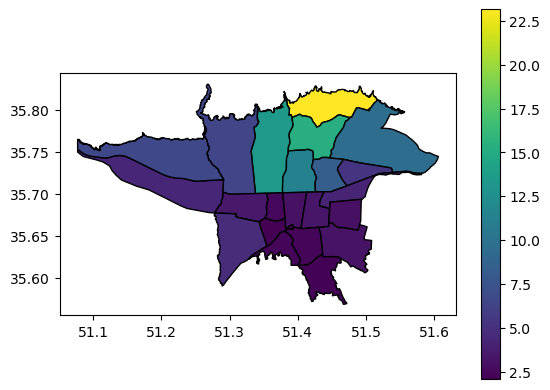

In [131]:
teh_geo = gd.read_file('Tehran_Regions.geojson')
df = data.groupby("DISOUT_ID", as_index = False).value.mean()
gdf = df.merge(teh_geo)
gdf = gd.GeoDataFrame(gdf)
gdf.plot(column='value', cmap='viridis', edgecolor='k', legend=True)

<AxesSubplot:>

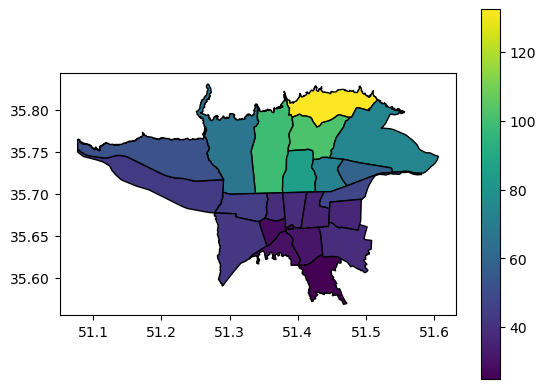

In [132]:
teh_geo = gd.read_file('Tehran_Regions.geojson')
df = data.groupby("DISOUT_ID", as_index = False).value_metr.mean()
gdf = df.merge(teh_geo)
gdf = gd.GeoDataFrame(gdf)
gdf.plot(column='value_metr', cmap='viridis', edgecolor='k', legend=True)

<AxesSubplot:>

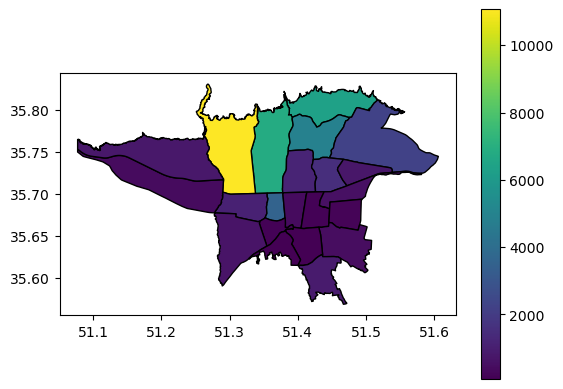

In [133]:
teh_geo = gd.read_file('Tehran_Regions.geojson')
df = data.groupby("DISOUT_ID", as_index = False).value_metr.count()
gdf = df.merge(teh_geo)
gdf = gd.GeoDataFrame(gdf)
gdf.plot(column='value_metr', cmap='viridis', edgecolor='k', legend=True)

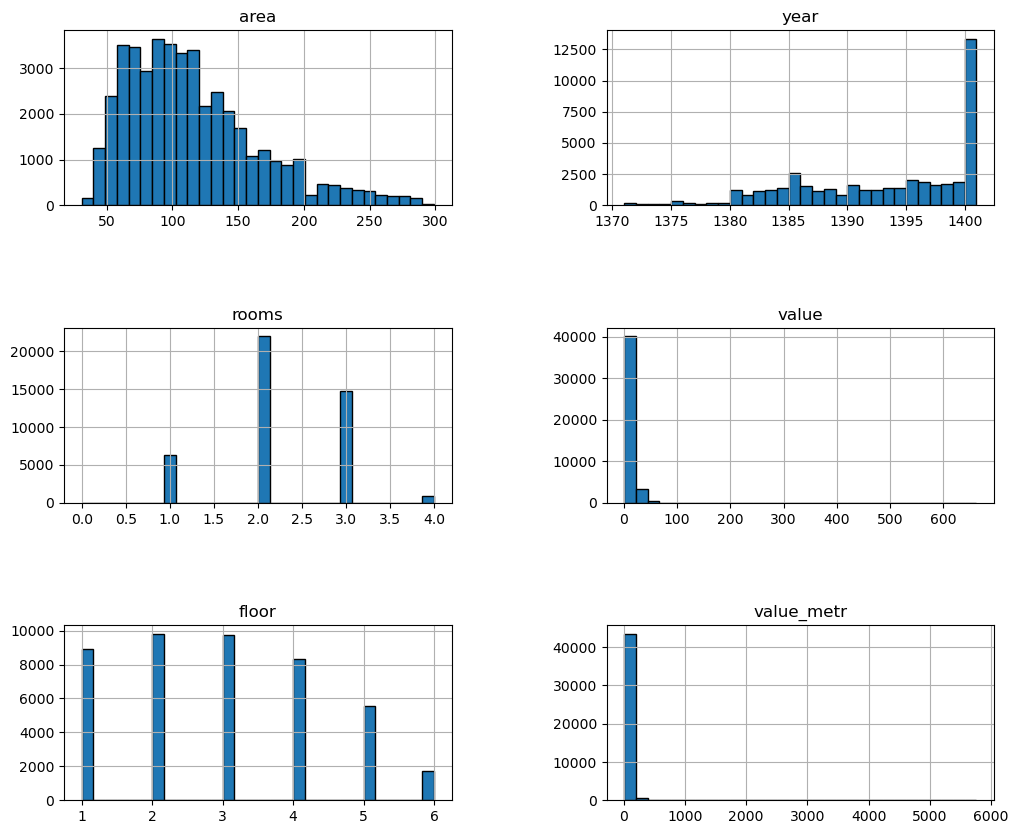

In [134]:
fea = data[['area', 'year', 'rooms', 'value', 'floor', 'value_metr']]
fea.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [143]:
matrix_corr = data.corr(numeric_only=True)
matrix_corr["value_metr"].sort_values(ascending=False)

value_metr                   1.000000
value                        0.882677
ave_price98                  0.459478
area                         0.417448
masahat_zirbana1400          0.372172
rooms                        0.322286
masahat_zamin1400            0.312493
District_number              0.234288
parking                      0.220225
warehouse                    0.220225
elevator                     0.217218
year                         0.192533
sarane_fazayesabz85          0.147341
kambod_mazad85               0.130745
floor                        0.120118
vehede_maskoni1400           0.115705
kol_mojavez1400              0.104245
masahat_mantaghe             0.066330
masahat_sabz85               0.065918
masahatsabz_of_mantaghe85    0.033815
khanevar95                   0.029723
population_woman95           0.028879
population95                 0.022660
population_man95             0.016235
tarakom_nafar_darhektar     -0.230006
DISOUT_ID                   -0.386307
Name: value_

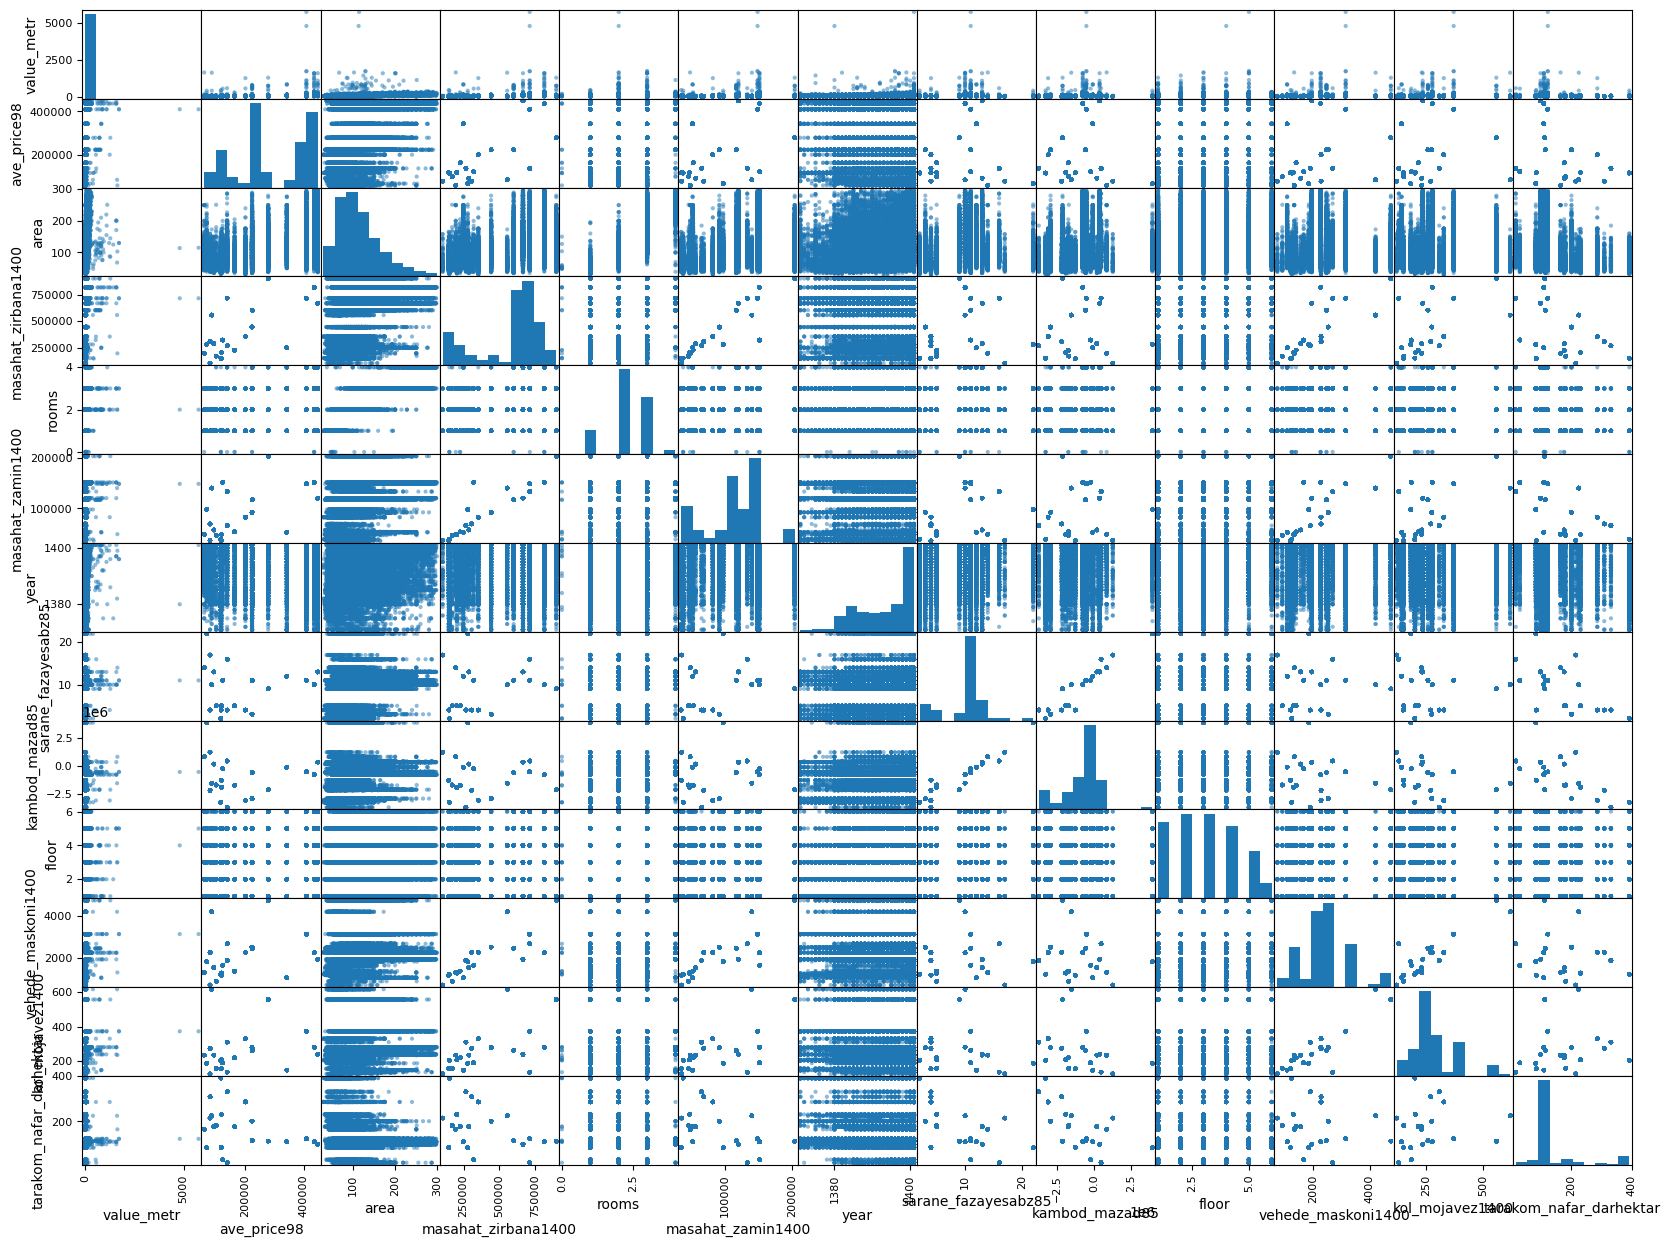

In [145]:
# keep
featuers=["value_metr","ave_price98","area","masahat_zirbana1400","rooms","masahat_zamin1400","year",
          "sarane_fazayesabz85",
          "kambod_mazad85","floor","vehede_maskoni1400","kol_mojavez1400","tarakom_nafar_darhektar"]

scatter_matrix(data[featuers],figsize=(20,15))
plt.show()

# "parking","warehouse","elevator",

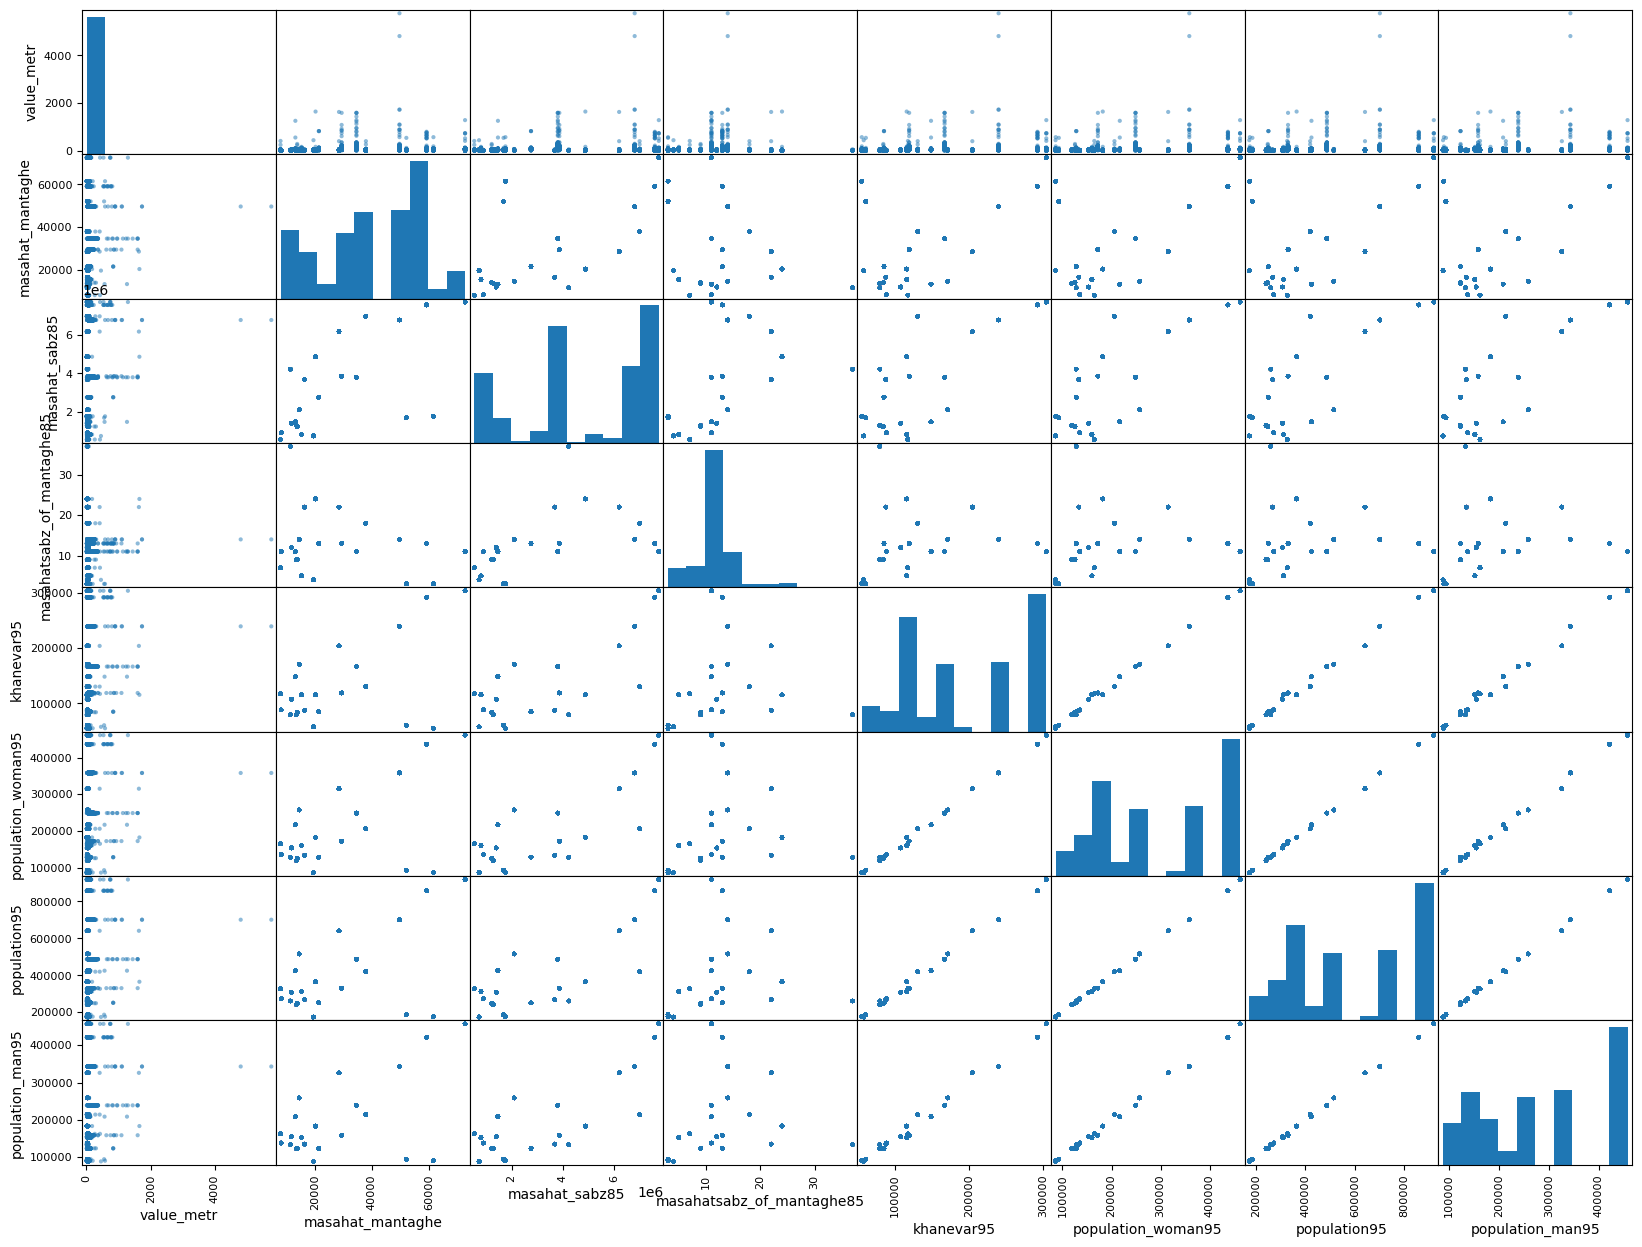

In [147]:
# drop
featuers=["value_metr","masahat_mantaghe","masahat_sabz85","masahatsabz_of_mantaghe85","khanevar95","population_woman95",
          "population95","population_man95"]

scatter_matrix(data[featuers],figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='value_metr', ylabel='Count'>

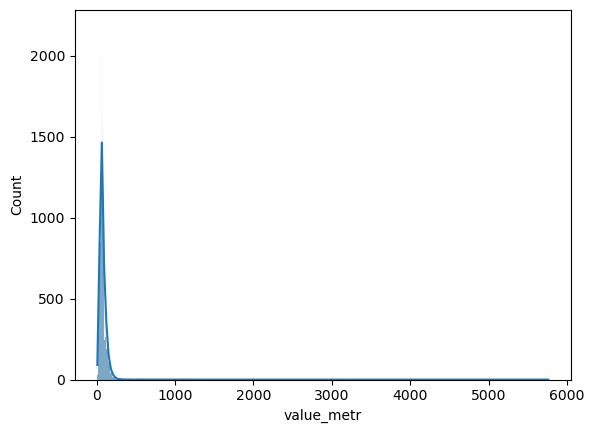

In [300]:
sns.histplot(data["value_metr"], kde=True)

# Strip

In [332]:
X=data.loc[:,data.columns!='value'].values
Y=data.loc[:,'value'].values

In [333]:
from sklearn.preprocessing import OneHotEncoder
coding=OneHotEncoder()

In [334]:
transformed_district=coding.fit_transform(df['district'].to_numpy().reshape(-1,1)).toarray()
X=np.delete(X,0,1)
X=np.concatenate((X,transformed_district),axis=1)


# Linear regression model

# 1 

In [368]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X,Y, test_size=0.3)

In [369]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [370]:
linear1 = LinearRegression()
linear1.fit(X1_train, y1_train)
y1_pred = linear1.predict(X1_test)

In [371]:
print("MSE lr: ", metrics.mean_squared_error(y1_test, y1_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y1_test, y1_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y1_test, y1_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y1_test, y1_pred))
print("MAE lr: ", metrics.mean_absolute_error(y1_test, y1_pred))

MSE lr:  2.700442225949242e+19
RMSE lr:  5196577937.401923
R2_SCORE lr:  0.7419139673467874
MAPE lr:  0.3436039320505783
MAE lr:  2519283450.692227


# 2

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X2_train, X2_test, y2_train, y2_test = train_test_split(X,Y, test_size=0.3)
st_x= StandardScaler()    
X2_train= st_x.fit_transform(X2_train)    
X2_test= st_x.transform(X2_test)

In [373]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [374]:
linear2 = LinearRegression()
linear2.fit(X2_train, y2_train)
y2_pred = linear2.predict(X2_test)

In [375]:
print("MSE lr: ", metrics.mean_squared_error(y2_test, y2_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y2_test, y2_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y2_test, y2_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y2_test, y2_pred))
print("MAE lr: ", metrics.mean_absolute_error(y2_test, y2_pred))

MSE lr:  1.2162884434281998e+42
RMSE lr:  1.1028546791976719e+21
R2_SCORE lr:  -1.1045097448635888e+22
MAPE lr:  9556620743.584145
MAE lr:  2.8088539997250384e+19


# 3

In [376]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X3_train, X3_test, y3_train, y3_test = train_test_split(X,Y, test_size=0.3)

In [377]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [378]:
linear3 = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
linear3.fit(X3_train, y3_train)
y3_pred = linear3.predict(X3_test)

In [379]:
print("MSE lr: ", metrics.mean_squared_error(y3_test, y3_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y3_test, y3_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y3_test, y3_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y3_test, y3_pred))
print("MAE lr: ", metrics.mean_absolute_error(y3_test, y3_pred))

MSE lr:  3.781495245901309e+42
RMSE lr:  1.9446067072550453e+21
R2_SCORE lr:  -3.195540571535953e+22
MAPE lr:  16012435067.184391
MAE lr:  3.5165134661707137e+19


# Ridge model

# 1

In [393]:
from sklearn.model_selection import train_test_split
a1_train, a1_test, b1_train, b1_test = train_test_split(X,Y, test_size=0.3)

In [394]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [395]:
ridge1 = Ridge(alpha=0.9)
ridge1.fit(a1_train, b1_train)
b1_pred = ridge1.predict(a1_test)

/home/cmos/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03693e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [396]:
print("MSE ridge: ", metrics.mean_squared_error(b1_test, b1_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b1_test, b1_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b1_test, b1_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b1_test, b1_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b1_test, b1_pred))

MSE ridge:  9.782986184528352e+19
RMSE ridge:  9890897929.171219
R2_SCORE ridge:  0.4593812266676812
MAPE ridge:  0.33707667457428075
MAE ridge:  2620990772.796227


# 2

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
a2_train, a2_test, b2_train, b2_test = train_test_split(X,y, test_size=0.3)
st_a= StandardScaler()    
a2_train= st_a.fit_transform(a2_train)    
a2_test= st_a.transform(a2_test)

In [398]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [399]:
ridge2 = Ridge(alpha=0.9)
ridge2.fit(a2_train, b2_train)
b2_pred = ridge2.predict(a2_test)

In [400]:
print("MSE ridge: ", metrics.mean_squared_error(b2_test, b2_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b2_test, b2_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b2_test, b2_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b2_test, b2_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b2_test, b2_pred))

MSE ridge:  5753.520820280265
RMSE ridge:  75.85196648921018
R2_SCORE ridge:  0.17341909113678022
MAPE ridge:  0.1697066952843969
MAE ridge:  14.15473430752799


# 3

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
a3_train, a3_test, b3_train, b3_test = train_test_split(X,y, test_size=0.3)

In [402]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [403]:
ridge3 = make_pipeline(preprocessing.StandardScaler(), Ridge())
ridge3.fit(a3_train, b3_train)
b3_pred = ridge3.predict(a3_test)

In [404]:
print("MSE ridge: ", metrics.mean_squared_error(b3_test, b3_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b3_test, b3_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b3_test, b3_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b3_test, b3_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b3_test, b3_pred))

MSE ridge:  2893.292445079978
RMSE ridge:  53.789333934154435
R2_SCORE ridge:  0.2932830249848629
MAPE ridge:  0.17381029145058463
MAE ridge:  13.659067629424207


# SGD model

# 1 

In [407]:
from sklearn.model_selection import train_test_split
m1_train, m1_test, n1_train, n1_test = train_test_split(X,Y, test_size=0.3)

In [408]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [409]:
sgd1 = SGDRegressor(max_iter=1000, tol=1e-3)
sgd1.fit(m1_train, n1_train)
n1_pred = sgd1.predict(m1_test)

In [410]:
print("MSE sgd: ", metrics.mean_squared_error(n1_test, n1_pred))
print("RMSE sgd: ", (metrics.mean_squared_error(n1_test, n1_pred))**(1/2.0))
print("R2_SCORE sgd: ", metrics.r2_score(n1_test, n1_pred))
print("MAPE sgd: ", metrics.mean_absolute_percentage_error(n1_test, n1_pred))
print("MAE sgd: ", metrics.mean_absolute_error(n1_test, n1_pred))

MSE sgd:  5.630588229800915e+43
RMSE sgd:  7.503724561709947e+21
R2_SCORE sgd:  -3.066998399013408e+23
MAPE sgd:  1170896041951.568
MAE sgd:  6.847216327319173e+21


# 2

In [415]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
m2_train, m2_test, n2_train, n2_test = train_test_split(X,Y, test_size=0.3)
st_m= StandardScaler()    
m2_train= st_m.fit_transform(m2_train)    
m2_test= st_m.transform(m2_test)

In [416]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [417]:
sgd2 = SGDRegressor()
sgd2.fit(m2_train, n2_train)
n2_pred = sgd2.predict(m2_test)

In [418]:
print("MSE sgd: ", metrics.mean_squared_error(n2_test, n2_pred))
print("RMSE sgd: ", (metrics.mean_squared_error(n2_test, n2_pred))**(1/2.0))
print("R2_SCORE sgd: ", metrics.r2_score(n2_test, n2_pred))
print("MAPE sgd: ", metrics.mean_absolute_percentage_error(n2_test, n2_pred))
print("MAE sgd: ", metrics.mean_absolute_error(n2_test, n2_pred))

MSE sgd:  1.0471775798744737e+23
RMSE sgd:  323601232981.96405
R2_SCORE sgd:  -951.9900689024615
MAPE sgd:  11.683130688430936
MAE sgd:  30090648849.088497


# 3

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
m3_train, m3_test, n3_train, n3_test = train_test_split(X,y, test_size=0.3)

In [421]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [422]:
sgd3 = make_pipeline(preprocessing.StandardScaler(), SGDRegressor())
sgd3.fit(m3_train, n3_train)
n3_pred = ridge3.predict(m3_test)

In [423]:
print("MSE sgd: ", metrics.mean_squared_error(n3_test, n3_pred))
print("RMSE sgd: ", (metrics.mean_squared_error(n3_test, n3_pred))**(1/2.0))
print("R2_SCORE sgd: ", metrics.r2_score(n3_test, n3_pred))
print("MAPE sgd: ", metrics.mean_absolute_percentage_error(n3_test, n3_pred))
print("MAE sgd: ", metrics.mean_absolute_error(n3_test, n3_pred))

MSE sgd:  3140.3587312270174
RMSE sgd:  56.03890372970386
R2_SCORE sgd:  0.27196696786714614
MAPE sgd:  0.1764370470817358
MAE sgd:  13.622871130154142


# Polynomial regression model

# degree 2

In [427]:
from sklearn.model_selection import train_test_split
c_train, c_test, d_train, d_test = train_test_split(X,Y, test_size=0.3)

In [428]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polyRegressor = PolynomialFeatures(degree=2)
c_train_poly = polyRegressor.fit_transform(c_train)
c_test_poly = polyRegressor.fit_transform(c_test)
poly = LinearRegression()
poly.fit(c_train_poly, d_train)
d_pred = poly.predict(c_test_poly)

In [ ]:
print("MSE poly: ", metrics.mean_squared_error(d_test, d_pred))
print("RMSE poly: ", (metrics.mean_squared_error(d_test, d_pred))**(1/2.0))
print("R2_SCORE poly: ", metrics.r2_score(d_test, d_pred))
print("MAPE poly: ", metrics.mean_absolute_percentage_error(d_test, d_pred))
print("MAE poly: ", metrics.mean_absolute_error(d_test, d_pred))

# degree 3

In [432]:
polyRegressor = PolynomialFeatures(degree=3)
c1_train_poly = polyRegressor.fit_transform(c_train)
c1_test_poly = polyRegressor.fit_transform(c_test)
poly = LinearRegression()
poly.fit(c1_train_poly, d_train)
d1_pred = poly.predict(c1_test_poly)

MemoryError: Unable to allocate 1.33 TiB for an array with shape (30869, 5935160) and data type float64

In [ ]:
print("MSE poly: ", metrics.mean_squared_error(d_test, d1_pred))
print("RMSE poly: ", (metrics.mean_squared_error(d_test, d1_pred))**(1/2.0))
print("R2_SCORE poly: ", metrics.r2_score(d_test, d1_pred))
print("MAPE poly: ", metrics.mean_absolute_percentage_error(d_test, d1_pred))
print("MAE poly: ", metrics.mean_absolute_error(d_test, d1_pred))